# Systematic Strategy Diagnostics: Mean Reversion vs Time-Series Momentum

**Objective:**  
Evaluate whether simple mean-reversion and time-series momentum strategies
produce robust, cost-aware, out-of-sample performance on a diversified ETF universe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
meanrev_sens = pd.read_csv("../data/processed/meanrev_sensitivity.csv")
meanrev_sens.head()

meanrev_wf = pd.read_csv("../data/processed/meanrev_walkforward.csv")
meanrev_wf.head()

,train_start,train_end,test_start,test_end,Sharpe,CAGR,MaxDD,AvgTurnover,TotalCost,AvgGrossExposure,PctInvested
0,2006-01-01,2008-12-31,2009-01-02,2009-12-31,0.112489,0.003635,-0.024402,0.066009,0.016634,0.042978,0.055556
1,2007-01-01,2009-12-31,2010-01-04,2010-12-31,-0.696690,-0.029554,-0.072354,0.184977,0.046614,0.150165,0.178571
2,2008-01-01,2010-12-31,2011-01-03,2011-12-30,-0.875420,-0.044208,-0.068575,0.223481,0.056317,0.183530,0.218254
3,2009-01-01,2011-12-31,2012-01-03,2012-12-31,-3.288733,-0.162940,-0.163138,0.264239,0.066060,0.242381,0.264000
4,2010-01-01,2012-12-31,2013-01-02,2013-12-31,-2.697665,-0.158207,-0.165812,0.310927,0.078354,0.269814,0.301587


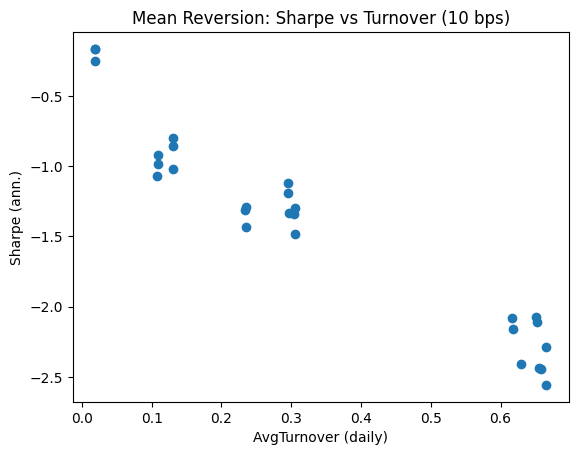

In [4]:
df = meanrev_sens.copy()
plt.figure()
plt.scatter(df["AvgTurnover"], df["Sharpe"])
plt.xlabel("AvgTurnover (daily)")
plt.ylabel("Sharpe (ann.)")
plt.title("Mean Reversion: Sharpe vs Turnover (10 bps)")
plt.show()

### Mean Reversion: Sensitivity Analysis (10 bps transaction costs)

**Observation:**
- Sharpe ratios are negative across the entire turnover spectrum.
- Lower turnover reduces losses but does not produce positive risk-adjusted returns.
- Higher turnover configurations degrade sharply, indicating cost amplification of a weak signal.

**Interpretation:**
Mean reversion in this universe appears structurally weak rather than merely cost-constrained.

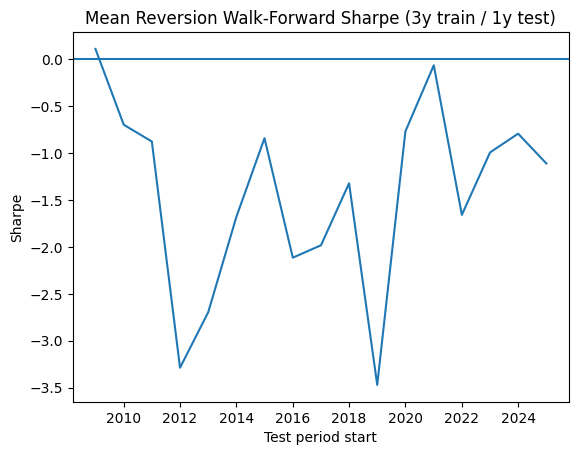

In [5]:
plt.figure()
plt.plot(pd.to_datetime(meanrev_wf["test_start"]), meanrev_wf["Sharpe"])
plt.axhline(0)
plt.xlabel("Test period start")
plt.ylabel("Sharpe")
plt.title("Mean Reversion Walk-Forward Sharpe (3y train / 1y test)")
plt.show()


### Mean Reversion: Walk-Forward Stability (3y train / 1y test)

**Observation:**
- Performance varies widely across folds, with frequent large negative Sharpe values.
- Positive Sharpe periods are rare and not persistent.
- No folds are “no-trade”, confirming the strategy is active rather than trivially inactive.

**Interpretation:**
The lack of temporal consistency suggests regime dependence and weak generalization.
This behavior is inconsistent with a robust systematic edge.

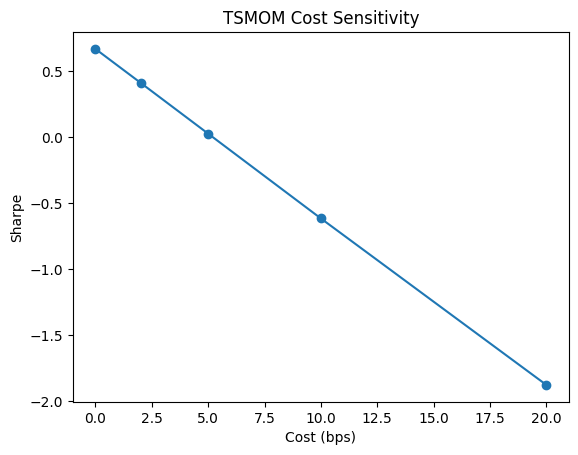

In [6]:
tsmom = pd.read_csv("../data/processed/tsmom_cost_sensitivity.csv")

plt.figure()
plt.plot(tsmom["cost_bps"], tsmom["Sharpe"], marker="o")
plt.xlabel("Cost (bps)")
plt.ylabel("Sharpe")
plt.title("TSMOM Cost Sensitivity")
plt.show()


### Time-Series Momentum: Transaction Cost Sensitivity

**Observation:**
- Gross performance is positive at low transaction costs.
- Sharpe decays approximately linearly as costs increase.
- At realistic cost levels (10–20 bps), performance becomes negative.

**Interpretation:**
Momentum signals exist but are highly sensitive to implementation frictions,
highlighting the importance of execution quality and turnover control.

## Key Takeaways

- Negative results are informative: not all intuitive signals survive costs and regime shifts.
- Walk-forward validation is essential; static backtests materially overstate robustness.
- Strategy evaluation should focus on **signal strength, turnover, and stability**, not headline Sharpe.

This project emphasizes diagnostics and falsification over curve fitting.